In [5]:
# Import the required pickle files
import pickle 

with open('../../Modelling/Binfiles/Classification/model_svm.pkl','rb') as file:
    model_svm = pickle.load(file)
    
with open('../../Modelling/Binfiles/Classification/scaler.pkl','rb') as file:
    scaler= pickle.load(file)
    
with open('../../Modelling/Binfiles/Classification/pca.pkl','rb') as file:
    pca = pickle.load(file)

## Model Pipeline

### 1. Image resizing

In [36]:
# Import required packages for pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

# Other required libraries
import cv2

In [37]:
# Constructing a custom tranformer for resizing images
class ResizeTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.dim = (72,72)
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB)
        X = cv2.resize(X, self.dim, interpolation = cv2.INTER_AREA)
        X = X.reshape(1,-1)
        return X

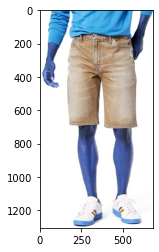

In [38]:
import matplotlib.pyplot as plt
image = cv2.imread('../../Test/temp.jpg')
plt.imshow(image)
plt.show()

In [39]:
# Unit testing
resize_trans = ResizeTransformer()
resize_trans.fit(image)
resized_image = resize_trans.transform(image)
print(f'Custom transformer reduced dimension from {image.shape} to {resized_image.shape}')

Custom transformer reduced dimension from (1306, 679, 3) to (1, 15552)


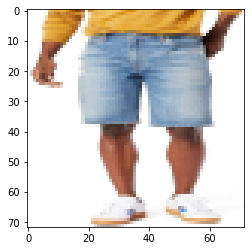

In [40]:
new_image = resized_image.reshape(72,72,3)
plt.imshow(new_image)

### 2. Scaling

In [41]:
print('Before scaling')
resized_image

Before scaling


array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [42]:
print('After scaling')
scaled_image = scaler.transform(resized_image)
scaled_image

After scaling


array([[1., 1., 1., ..., 1., 1., 1.]])

### 3. PCA

In [43]:
reduced_image = pca.transform(scaled_image)
print(f'PCA reduced dimension from {scaled_image.shape} to {reduced_image.shape}')

PCA reduced dimension from (1, 15552) to (1, 469)


### 4. Model

In [44]:
labels = ['Hoodie/Sweatshirt', 'Jeans', 'Leather Jacket', 'Pants', 'Raincoat', 'Shorts', 'Sleepwear', 'Socks',
         'Suits/Blazers', 'Sweater']

In [45]:
prediction = model_svm.predict(reduced_image)
prediction

array([5], dtype=int64)

Text(0.5, 1.0, 'Shorts')

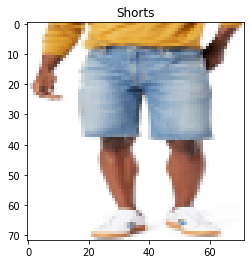

In [46]:
new_image = resized_image.reshape(72,72,3)
plt.imshow(new_image)
plt.title(labels[prediction[0]])

In [47]:
# Constructing a custom tranformer for resizing images
class CategoryPredictor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.model = model_svm
        self.labels = ['Hoodie/Sweatshirt', 'Jeans', 'Leather Jacket', 'Pants', 'Raincoat', 'Shorts', 'Sleepwear', 'Socks',
         'Suits/Blazers', 'Sweater']
    
    def fit(self,X,y=None):
        return self.model
    
    def predict(self,X,y=None):
        prediction = self.model.predict(X)
        return self.labels[prediction[0]]

In [48]:
predictor = CategoryPredictor()
predictor.predict(reduced_image)

'Shorts'

### 5. Model Pipeline 

In [49]:
model_pipeline = Pipeline([('resize_trans',resize_trans), ('scaler',scaler), ('pca',pca), ('predictor',predictor)])

In [50]:
model_pipeline.predict(image)

'Shorts'